In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [3]:
data_dir = r"C:\Users\syeds\OneDrive\Desktop\Task2\kagglecatsanddogs_5340\PetImages"
img_size = (180, 180)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 24991 files belonging to 2 classes.
Using 19993 files for training.
Found 24991 files belonging to 2 classes.
Using 4998 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # ✅ Binary output
])


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3  # Change to 10 later if it's working well
)


Epoch 1/3
625/625 [==============================] - 2757s 4s/step - loss: 0.6081 - accuracy: 0.6528 - val_loss: 0.5407 - val_accuracy: 0.7311
Epoch 2/3
625/625 [==============================] - 975s 2s/step - loss: 0.4829 - accuracy: 0.7651 - val_loss: 0.4646 - val_accuracy: 0.7869
Epoch 3/3
625/625 [==============================] - 573s 916ms/step - loss: 0.4030 - accuracy: 0.8188 - val_loss: 0.4648 - val_accuracy: 0.7757


In [8]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"✅ Final Validation Accuracy: {val_acc:.2f}")
print(f"✅ Final Validation Loss: {val_loss:.2f}")


157/157 [==============================] - 32s 200ms/step - loss: 0.4648 - accuracy: 0.7757
✅ Final Validation Accuracy: 0.78
✅ Final Validation Loss: 0.46


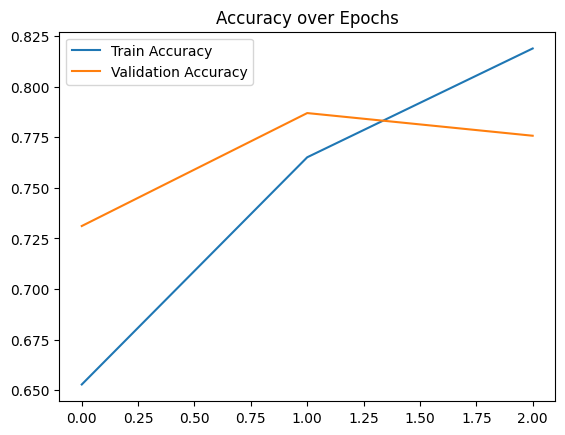

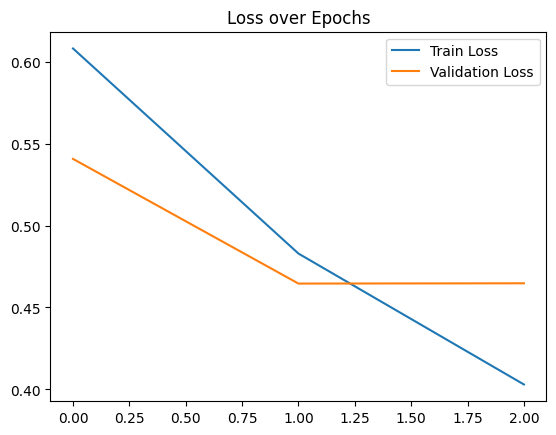

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.legend()
plt.show()


In [10]:
model.save("cat_dog_classifier_model.h5")
print("✅ Model saved!")


✅ Model saved!


In [6]:
#Predict on a New Image (Cat or Dog)
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

img_path = "C:/Users/syeds/OneDrive/Desktop/Task2/CAT.jpeg"


img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
class_names = train_ds.class_names
predicted_class = class_names[int(predictions[0] > 0.5)]

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()

print("✅ Model Prediction:", predicted_class)


NameError: name 'model' is not defined

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Cat vs Dog)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
model.save("cat_dog_model.h5")


In [11]:
from tensorflow.keras.models import load_model
model = load_model("cat_dog_model.h5")


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your test image
img_path = "C:/Users/syeds/OneDrive/Desktop/Task2/CAT.jpeg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict using the trained model
predictions = model.predict(img_array)

# Get class names from training dataset
class_names = train_ds.class_names
predicted_class = class_names[int(predictions[0][0] > 0.5)]

print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 50ms/step


NameError: name 'train_ds' is not defined

In [16]:
class_names = ['Cat', 'Dog']


In [17]:
predicted_class = class_names[int(predictions[0][0] > 0.5)]
print(f"Predicted class: {predicted_class}")


Predicted class: Cat
